Import Pandas and read csv

In [2]:
import pandas as pd
d = pd.read_csv('student/student-por.csv', sep=';')

print length of dataSet

In [3]:
len(d)

649

convert G1-3 to pass column to siplify it for AI

In [4]:
d["pass"] = d.apply(lambda row: 1 if (row["G1"]+row["G2"]+row["G3"])>=35 else 0, axis=1)
d = d.drop(["G1", "G2", "G3"],axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


convert string columns to numbers

In [5]:
d = pd.get_dummies(d, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


shuffle dataSet

In [6]:
d = d.sample(frac=1)

split dataSet to training and testing

In [7]:
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

number of students passing

In [8]:
import numpy as np
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 328 out of 649 (50.54%)


fit a decision tree

In [9]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att, d_train_pass)

save tree as PDF

In [10]:
tree.export_graphviz(t, out_file="student/student-por-tree.dot", label="all", impurity=False, proportion=True, feature_names=list(d_train_att), class_names=["fail", "pass"], filled=True, rounded=True)

check the score of the tree using the testing set

In [11]:
t.score(d_test_att, d_test_pass)

0.7114093959731543

cross verifying the result

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and +/- two standard deviations away (converting 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.08)


Test which max_depth is the best

In [13]:
for numbr in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=numbr)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (numbr, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.64 (+/- 0.06)
Max depth: 2, Accuracy: 0.69 (+/- 0.08)
Max depth: 3, Accuracy: 0.70 (+/- 0.04)
Max depth: 4, Accuracy: 0.71 (+/- 0.05)
Max depth: 5, Accuracy: 0.68 (+/- 0.08)
Max depth: 6, Accuracy: 0.68 (+/- 0.08)
Max depth: 7, Accuracy: 0.66 (+/- 0.05)
Max depth: 8, Accuracy: 0.69 (+/- 0.04)
Max depth: 9, Accuracy: 0.69 (+/- 0.03)
Max depth: 10, Accuracy: 0.68 (+/- 0.04)
Max depth: 11, Accuracy: 0.70 (+/- 0.02)
Max depth: 12, Accuracy: 0.66 (+/- 0.05)
Max depth: 13, Accuracy: 0.66 (+/- 0.06)
Max depth: 14, Accuracy: 0.66 (+/- 0.05)
Max depth: 15, Accuracy: 0.66 (+/- 0.05)
Max depth: 16, Accuracy: 0.65 (+/- 0.03)
Max depth: 17, Accuracy: 0.66 (+/- 0.02)
Max depth: 18, Accuracy: 0.65 (+/- 0.04)
Max depth: 19, Accuracy: 0.66 (+/- 0.04)


Test max_depth to show in graph

In [23]:
depth_acc = np.empty((19,3), float)
i = 0
for numbr in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=numbr)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i, 0] = numbr
    depth_acc[i, 1] = scores.mean()
    depth_acc[i, 2] = scores.std() * 2
    i += 1

depth_acc.tolist()

[[1.0, 0.637984496124031, 0.062202506916166286],
 [2.0, 0.6872748956469887, 0.08205067881238776],
 [3.0, 0.7026356589147287, 0.04370313186356282],
 [4.0, 0.7057125819916517, 0.05064200434423862],
 [5.0, 0.6857483601669647, 0.08573278355207861],
 [6.0, 0.6718664281454979, 0.07217775895425543],
 [7.0, 0.6718425760286224, 0.047216673626882276],
 [8.0, 0.694943351222421, 0.03625964257590459],
 [9.0, 0.6794871794871794, 0.055989103852127894],
 [10.0, 0.6887537268932618, 0.06193291137917985],
 [11.0, 0.687227191413238, 0.06610219047486102],
 [12.0, 0.6718187239117472, 0.01977836746376666],
 [13.0, 0.6594633273703041, 0.03858778630925769],
 [14.0, 0.6579487179487179, 0.05164996230569911],
 [15.0, 0.6595229576624925, 0.04473314289178137],
 [16.0, 0.6610494931425164, 0.042509357525771965],
 [17.0, 0.6563983303518186, 0.034320983285638755],
 [18.0, 0.6687537268932617, 0.05249579451767697],
 [19.0, 0.6456052474657126, 0.03377735991586918]]

Convet the list to graph

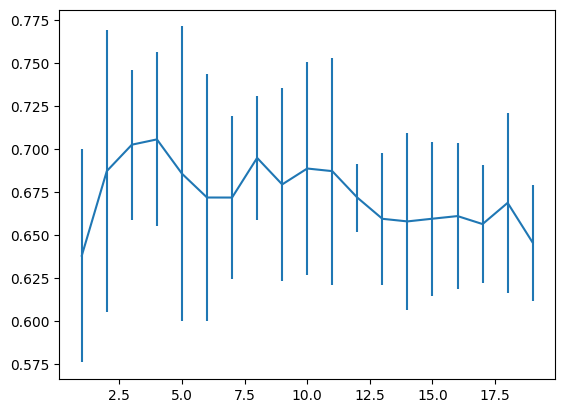

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr = depth_acc[:,2])
plt.show()


Test max_depth multiple times and show in graph

0
1
<class 'list'>


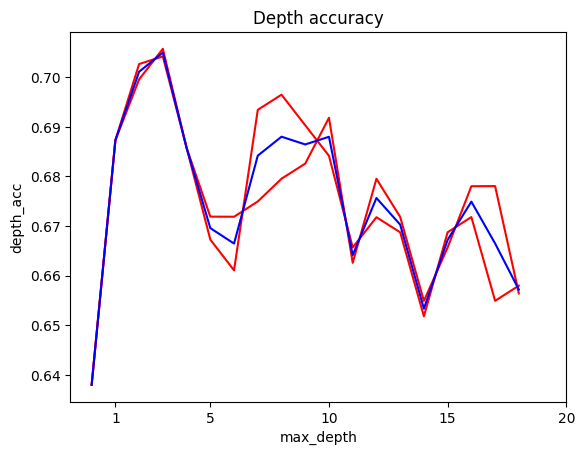

max: (array([], dtype=int64), array([], dtype=int64))


In [38]:
all_depth_acc = []
for i in range(2):
    depth_acc = []
    for numbr in range(1, 20):
        t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=numbr)
        scores = cross_val_score(t, d_att, d_pass, cv=5)

        depth_acc.append(scores.mean())

    all_depth_acc.append(depth_acc)
    plt.plot(depth_acc, color="red")
    print(i)

plt.plot(np.array(all_depth_acc).mean(axis=0), color="blue")
print(type(all_depth_acc))
plt.title("Depth accuracy")
plt.xlabel("max_depth")
plt.xticks(ticks=[1, 5, 10, 15, 20])
plt.ylabel("depth_acc")
plt.show()
print(f"max: {(np.where(all_depth_acc == max(np.array(all_depth_acc).mean(axis=0))))}")